In [2]:
%run 001overview.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB
False    2935849
Name: date, dtype: int64
False    2935849
Name: date_block_num, dtype: int64
False    2935849
Name: shop_id, dtype: int64
False    2935849
Name: item_id, dtype: int64
False    2935849
Name: item_price, dtype: int64
False    2935849
Name: item_cnt_day, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-n

## 年別

In [27]:
train['year'] = train.date.apply(lambda x: x.year) #　約10秒
%timeit

In [4]:
year0 = train.date[0].year
year0

2013

In [5]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year
0,2013-02-01,0,59,22154,999.00,1.0,2013
1,2013-03-01,0,25,2552,899.00,1.0,2013
2,2013-05-01,0,25,2552,899.00,-1.0,2013
3,2013-06-01,0,25,2554,1709.05,1.0,2013
4,2013-01-15,0,25,2555,1099.00,1.0,2013


Text(0.5, 1.0, '年別の購買回数')

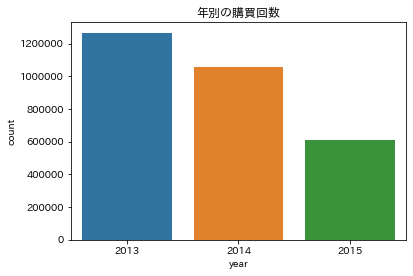

In [6]:
sns.countplot(x='year', data=train).set_title('年別の購買回数')

Text(0.5, 1.0, '年別の売り上げ')

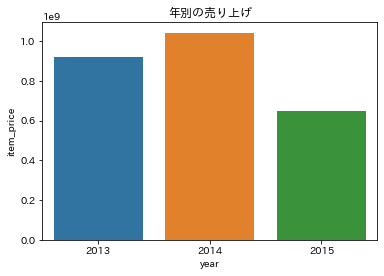

In [7]:
train_per_year = train.groupby('year').sum().reset_index()
sns.barplot(x='year',y='item_price', data=train_per_year).set_title('年別の売り上げ')

Text(0.5, 1.0, '1回の購買における購入価格')

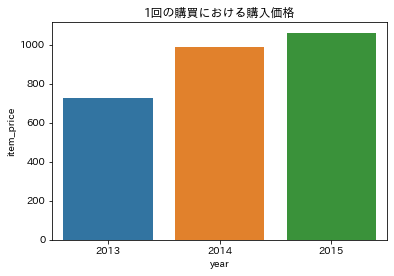

In [8]:
train_year = train.groupby('year').mean().reset_index()
sns.barplot(x='year',y='item_price',data=train_year).set_title('1回の購買における購入価格')

## item_cnt_dayについて

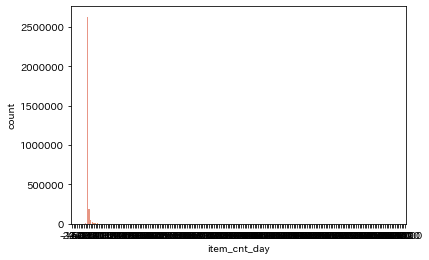

In [9]:
sns.countplot(x='item_cnt_day', data=train) 
#多くが１つで販売されているが、それ以外の個数での販売も多数ある

## dateblock別（毎月）

Text(0.5, 1.0, '毎月の購買回数')

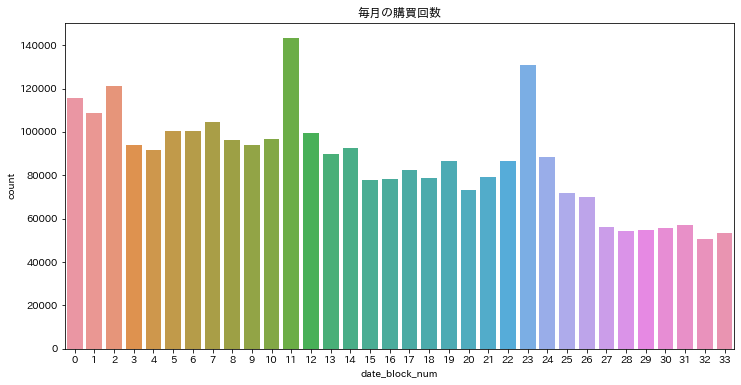

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='date_block_num',data=train).set_title('毎月の購買回数')

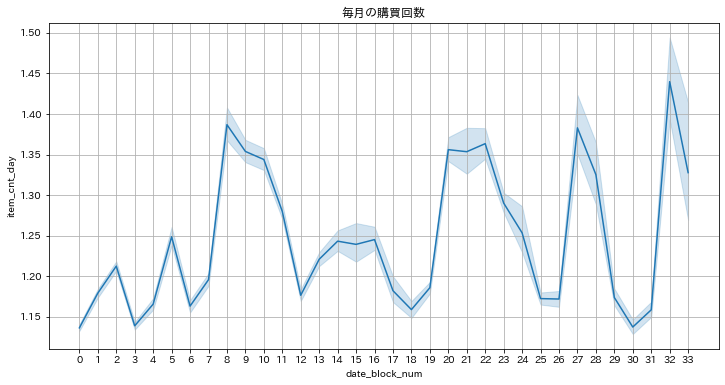

In [11]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date_block_num',y='item_cnt_day',data=train).set_title('毎月の購買回数')
plt.xticks(np.arange(0,34))
plt.grid(True)

In [12]:
train['total_price'] = train.item_price * train.item_cnt_day

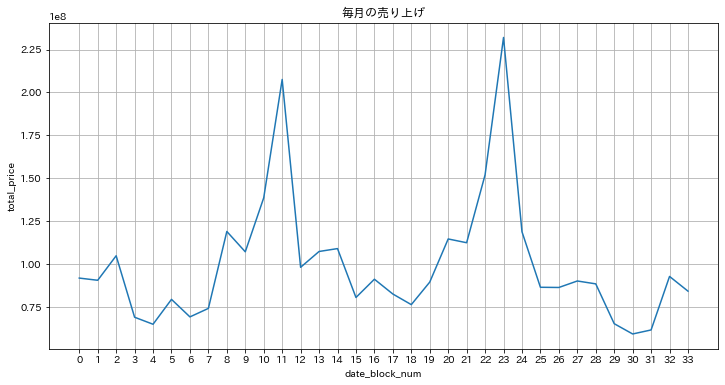

In [13]:
train_groupby_month = train.groupby('date_block_num').sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='date_block_num', y='total_price', data=train_groupby_month).set_title('毎月の売り上げ')
plt.xticks(np.arange(0,34))
plt.grid(True)

In [14]:
train.date_block_num.value_counts().sort_index()

0     115690
1     108613
2     121347
3      94109
4      91759
5     100403
6     100548
7     104772
8      96137
9      94202
10     96736
11    143246
12     99349
13     89830
14     92733
15     77906
16     78529
17     82408
18     78760
19     86614
20     73157
21     79361
22     86428
23    130786
24     88522
25     71808
26     69977
27     56274
28     54548
29     54617
30     55549
31     57029
32     50588
33     53514
Name: date_block_num, dtype: int64

In [15]:
train_groupby_month #date_block_numごとの「合計」

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price
0,0,3417068,1183971787,8.221187e+07,131479.0,232883970,9.194709e+07
1,1,3111582,1076043980,7.558019e+07,128090.0,218637969,9.066571e+07
2,2,4016457,1220911622,8.429831e+07,147142.0,244271511,1.049327e+08
3,3,3164978,971345965,6.151282e+07,107190.0,189441417,6.915429e+07
4,4,3093999,950372988,5.727413e+07,106970.0,184710867,6.506531e+07
5,5,3364700,1047351238,6.334361e+07,125381.0,202111239,7.955041e+07
6,6,3376156,1067060380,6.219681e+07,116966.0,202403124,6.935060e+07
7,7,3510787,1065970958,6.543817e+07,125291.0,210906036,7.429797e+07
8,8,3208314,957871641,7.270157e+07,133332.0,193523781,1.190819e+08
9,9,3101078,966066011,7.391497e+07,127541.0,189628626,1.072416e+08


In [16]:
train_groupby_month['month_count'] = train['date_block_num'].value_counts().sort_index()
train_groupby_month['total_price_mean'] = train_groupby_month['total_price'] / train_groupby_month['month_count']
train_groupby_month

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,month_count,total_price_mean
0,0,3417068,1183971787,8.221187e+07,131479.0,232883970,9.194709e+07,115690,794.771295
1,1,3111582,1076043980,7.558019e+07,128090.0,218637969,9.066571e+07,108613,834.759259
2,2,4016457,1220911622,8.429831e+07,147142.0,244271511,1.049327e+08,121347,864.732438
3,3,3164978,971345965,6.151282e+07,107190.0,189441417,6.915429e+07,94109,734.831797
4,4,3093999,950372988,5.727413e+07,106970.0,184710867,6.506531e+07,91759,709.089162
5,5,3364700,1047351238,6.334361e+07,125381.0,202111239,7.955041e+07,100403,792.311045
6,6,3376156,1067060380,6.219681e+07,116966.0,202403124,6.935060e+07,100548,689.726299
7,7,3510787,1065970958,6.543817e+07,125291.0,210906036,7.429797e+07,104772,709.139557
8,8,3208314,957871641,7.270157e+07,133332.0,193523781,1.190819e+08,96137,1238.668688
9,9,3101078,966066011,7.391497e+07,127541.0,189628626,1.072416e+08,94202,1138.421823


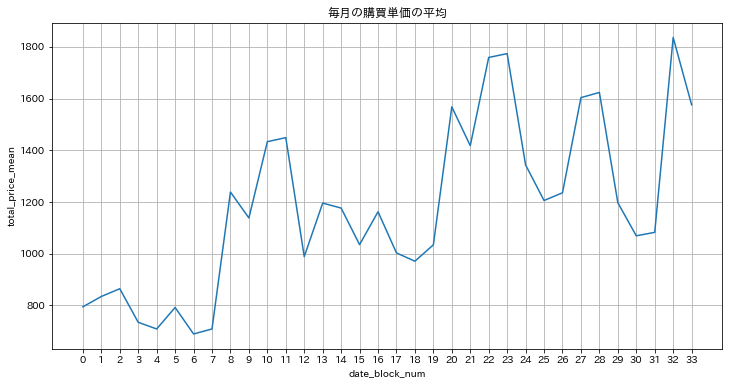

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date_block_num', y='total_price_mean', data=train_groupby_month).set_title('毎月の購買単価の平均')
plt.xticks(np.arange(0,34))
plt.grid(True)

## 各月ごとに集計(1月,2月,,,)

In [18]:
train_groupby_month['month'] = train_groupby_month.date_block_num.mod(12) + 1

In [19]:
train_groupby_month.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,month_count,total_price_mean,month
0,0,3417068,1183971787,8.221187e+07,131479.0,232883970,9.194709e+07,115690,794.771295,1
1,1,3111582,1076043980,7.558019e+07,128090.0,218637969,9.066571e+07,108613,834.759259,2
2,2,4016457,1220911622,8.429831e+07,147142.0,244271511,1.049327e+08,121347,864.732438,3
3,3,3164978,971345965,6.151282e+07,107190.0,189441417,6.915429e+07,94109,734.831797,4
4,4,3093999,950372988,5.727413e+07,106970.0,184710867,6.506531e+07,91759,709.089162,5


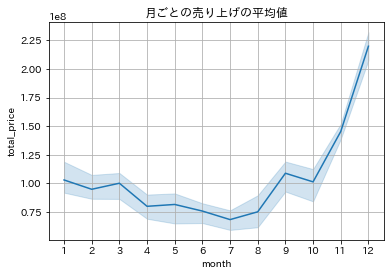

In [20]:
sns.lineplot(x='month',
            y='total_price', 
            data=train_groupby_month).set_title('月ごとの売り上げの平均値')
plt.xticks(np.arange(1,13))
plt.grid(True)

## 曜日別

In [21]:
train['date'] = pd.to_datetime(train['date'])

In [22]:
train['week_day'] = train['date'].apply(lambda x: x.dayofweek)
train.head() # 約1分

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day
0,2013-02-01,0,59,22154,999.00,1.0,2013,999.00,4
1,2013-03-01,0,25,2552,899.00,1.0,2013,899.00,4
2,2013-05-01,0,25,2552,899.00,-1.0,2013,-899.00,2
3,2013-06-01,0,25,2554,1709.05,1.0,2013,1709.05,5
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1099.00,1


Text(0.5, 1.0, '曜日別購買回数')

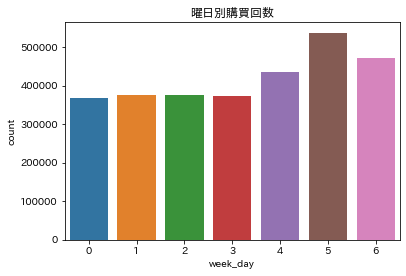

In [23]:
sns.countplot(x='week_day', data=train).set_title('曜日別購買回数') 

Text(0.5, 1.0, '曜日ごとの売り上げ')

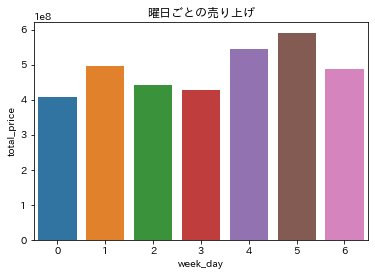

In [24]:
train_groupby_weekday = train.groupby('week_day').sum().reset_index()
sns.barplot(x='week_day', y='total_price', data=train_groupby_weekday).set_title('曜日ごとの売り上げ')

Text(0.5, 1.0, '曜日ごとの購買単価')

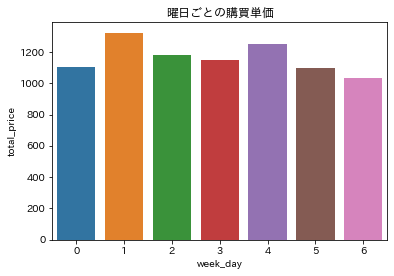

In [25]:
train_groupby_weekday_mean= train.groupby('week_day').mean().reset_index()
sns.barplot(x='week_day', y='total_price', data=train_groupby_weekday_mean).set_title('曜日ごとの購買単価')

## 祝日の処理

In [26]:
public_holidays = [] # ここにその年ごとの祝日を打ち込むしかないのだろうか、、、